# 1. Get the Data

In [1]:
import requests
import tarfile
from pathlib import Path
import pandas as pd

In [2]:
data_path = Path("data/housing.tgz") # the tgz file from github that we need
url = "https://github.com/ageron/data/raw/main/housing.tgz" # github url for the file

# checking if the file already exists
if data_path.is_file(): 
    print(f"The {data_path} file already exists.")

# downloading the data if the file doesn't exists
else:
    # create the data directory to download the file
    Path("data").mkdir(parents = True, exist_ok = True)

    # open the directory and retrieve the file from the url and write to the directory
    with open(data_path, "wb") as f:
        request = requests.get(url)
        print("Downloading the data.....")
        f.write(request.content)

    # extract the data from tgz file
    with tarfile.open(data_path) as data:
        data.extractall("data")
        print(f"Data extracted to {data_path}")
    

The data/housing.tgz file already exists.


In [3]:
data = pd.read_csv(Path("data/housing/housing.csv"))

# 2. Data Exploration

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**There appear to be some null values in the total_bedrooms.**

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Looking at the value count and value types in the object Dtype Ocean_proximity feature
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## 2.1 Visualization of Data

In [9]:
import matplotlib.pyplot as plt

# defining a default font_size
plt.rc('font', size=14)
plt.rc('axes', labelsize=10, titlesize=14)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

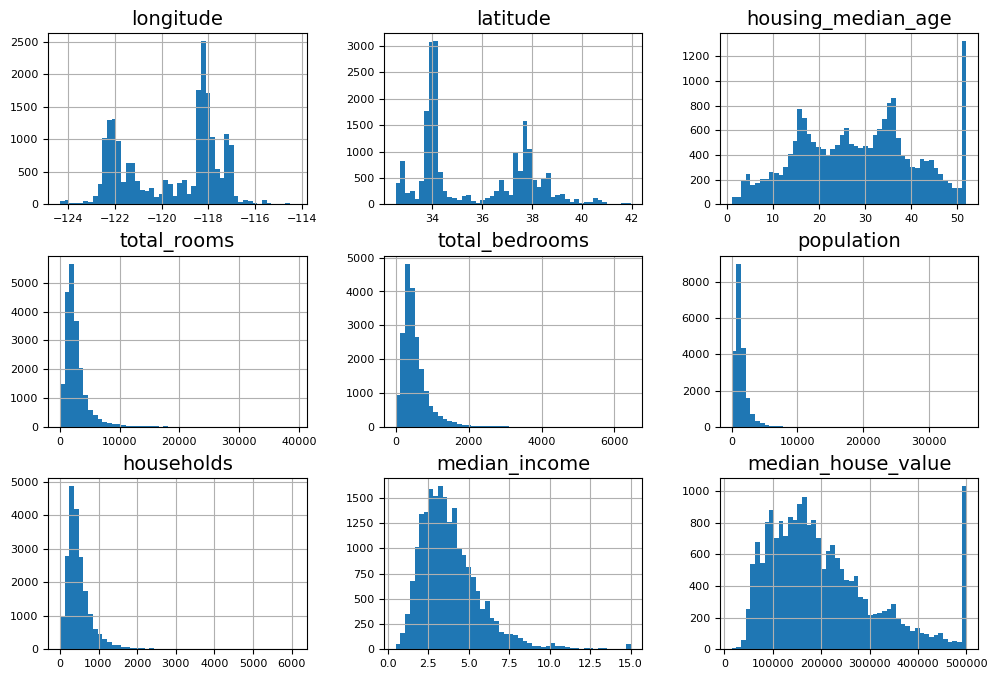

In [10]:
## Histogram Plot for all the features
data.hist(bins = 50, figsize = (12,8))
plt.show()

## 2.2 Creating a Train and Test Split for further exploration

Our median_income category has people with different income to represent
all the income categories of people performing stratified sampling of income

In [11]:
import numpy as np
# Creating income_cat colum temporarily to perfrom stratified sampling based on this column
data["income_cat"] = pd.cut(data["median_income"],
                           bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                           labels = [1, 2, 3, 4, 5]) # x -> x * 10,000

data["income_cat"].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

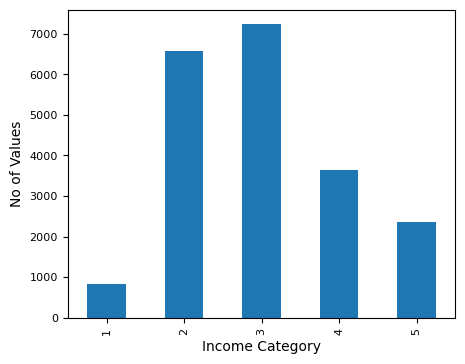

In [12]:
data["income_cat"].value_counts().sort_index().plot.bar(figsize = (5,4))
plt.xlabel("Income Category")
plt.ylabel("No of Values")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, 
                               stratify = data["income_cat"],
                              random_state = 42)
len(train_set), len(test_set)

(16512, 4128)

## 2.3 Geographical Data Visualization

In [14]:
# Creating a copy of train_set for visualization and Exploration
train = train_set.copy()

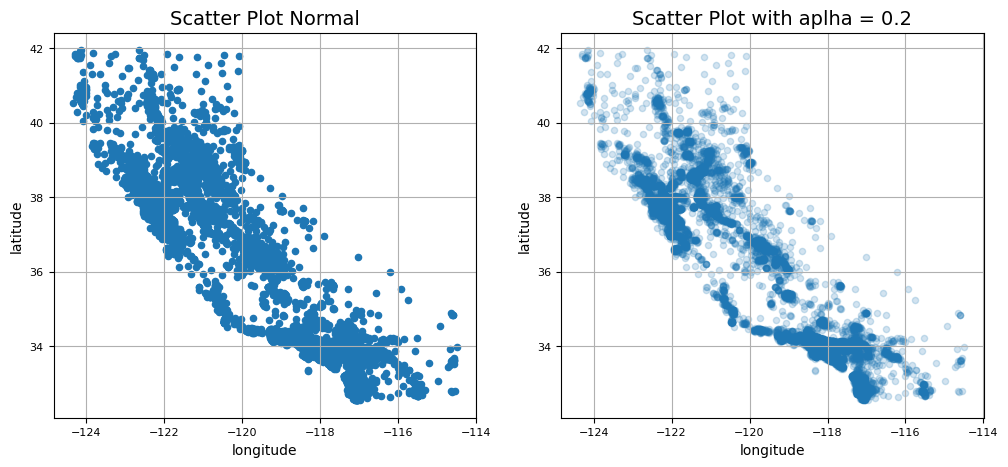

In [15]:
## Visualizing the geographical data
fig,axes = plt.subplots(1,2,figsize = (12,5))

# simple plot
train.plot(kind="scatter", x="longitude", y="latitude", grid=True,
         figsize = (12,5), ax = axes[0])
axes[0].set_title("Scatter Plot Normal")

#plot with alpha = 0.2
train.plot(kind="scatter", x="longitude", y="latitude", grid=True, 
          alpha = 0.2, figsize = (12,5), ax = axes[1])
axes[1].set_title("Scatter Plot with aplha = 0.2")

plt.show()

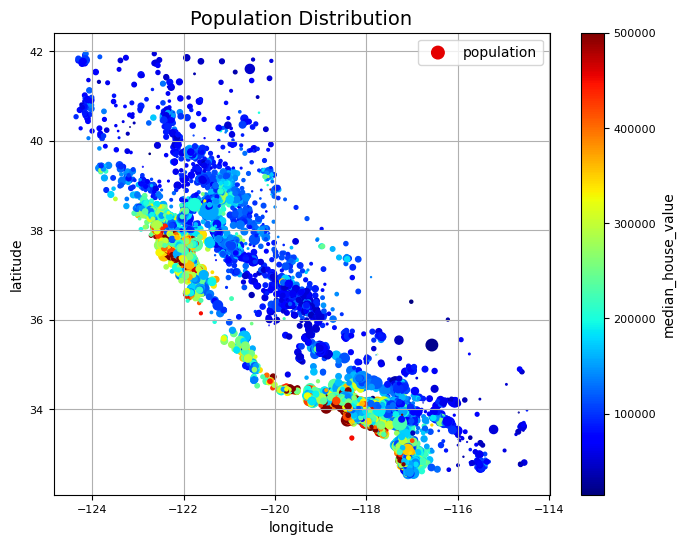

In [16]:
train.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True,
         s = train["population"] / 100, label = "population",
         c = "median_house_value", cmap = "jet", colorbar = True,
         legend = True, figsize = (8,6))
plt.title("Population Distribution")

plt.show()

## 2.4 Looking for the Correlation

In [17]:
# Creating a correlation matrix and removing the object feature (numeric_only)
corr_matrix = train.corr(numeric_only = True) 
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [18]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

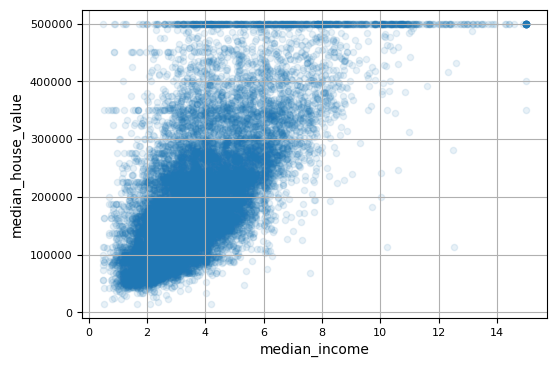

In [19]:
# Correlation of median_income with the median_house_value
train.plot(kind = "scatter", x = "median_income", y = "median_house_value",
          alpha = 0.1, grid = True, figsize= (6,4))
plt.show()

**The Data seems to have been limited to 500000, and there also appear these income limit lines near 350000 as well.**

## 2.5 Experimenting with Feature Combinations

In [20]:
train["rooms_per_house"] = train["total_rooms"]/train["households"]
train["bedrooms_ratio"] = train["total_bedrooms"] / train["total_rooms"]
train["people_per_house"] = data["population"] / train["households"]

In [21]:
corr_matrix_1 = train.corr(numeric_only = True)
corr_matrix_1["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

**These Features does seem to correlate to the Median House Value.**

# 3. Preparing the Data for Machine Learning

In [22]:
# Seperating the X_features and y_target form the train_set

# drop() doesn't change the original train_set just creates a copy
# adding inplace = True would change the original

X_train = train_set.drop("median_house_value", axis = 1)
y_train = train_set["median_house_value"].copy()

len(X_train), len(y_train)

(16512, 16512)

## 3.1 Data Cleaning

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.8+ MB


### 3.1.1. Using imputer to fill the missing values

**Using standardimputer to impute the missing values in the total_bedrooms**

In [24]:
null_value_idx = X_train.isnull().any(axis = 1) # returns boolean values to use as mask
X_train.loc[null_value_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN,5


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
X_train_num = X_train.select_dtypes(include = [np.number])
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [26]:
# Learned parameter i.e. median of each feature
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

**Note:** 
Transform returns a numpy array as default


In [27]:
# this code sets the config to return the dataframe
from sklearn import set_config
set_config(transform_output = "pandas")

# transforming the whole numerical values because there might be other features
# with null values in the future. So to be safe in the pipeline use imputer for all.


X_train_num_prepared = imputer.transform(X_train_num)

In [28]:
## check to see it it replaced the null values
X_train_num_prepared[null_value_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


### 3.1.2 Handling the Categorical Value

In [29]:
X_train_cat = X_train[["ocean_proximity"]] # double brackets gets us a dataframe
X_train_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output = False,
                            handle_unknown = 'ignore')
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0


### 3.1.3 Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_num_scaled = std_scaler.fit_transform(X_train_num)
X_train_num_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365


When a feature’s distribution has a heavy tail (i.e., when values far from the mean
are not exponentially rare), both min-max scaling and standardization will squash
most values into a small range. Machine learning models generally don’t like.

So before scaling the features
transforming the heavy tail, and if possible to make the distribution roughly
symmetrical is a good idea. 

For example, a common way to do this for positive features with a heavy
tail to the right is to replace the feature with its square root (or raise the feature to
a power between 0 and 1). If the feature has a really long and heavy tail, such as a
power law distribution, then replacing the feature with its logarithm may help.

### 3.1.4 Transformations

#### 3.1.4.1 Log Transformation for Heavy tails

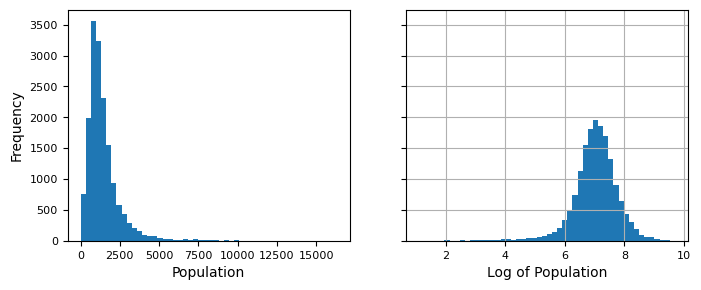

In [32]:
## Visualization of the transformation

fig, axs = plt.subplots(1,2,figsize = (8,3), sharey = True)

X_train["population"].plot(kind = "hist", bins = 50,  
                           ax = axs[0])
X_train["population"].apply(np.log).hist(bins = 50, ax = axs[1])
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of Population")
plt.show()

Another approach to handle heavy-tailed features consists in bucketizing the feature.

#### 3.4.1.2 Gaussian RBF for Multimodal distributions

<Axes: >

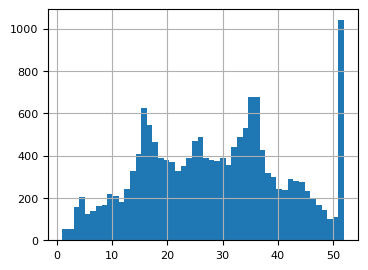

In [33]:
X_train["housing_median_age"].hist(bins = 50, figsize = (4,3))

When a feature has a multimodal distribution (i.e., with two or more clear peaks,
called modes), such as the housing_median_age feature, it can also be helpful to
bucketize it, but this time treating the bucket IDs as categories, rather than as numerical values.

Another approach to transforming multimodal distributions is to add a feature for
each of the modes (at least the main ones), representing the similarity between the
housing median age and that particular mode. The similarity measure is typically
computed using a `radial basis function (RBF)`—any function that depends only on the
distance between the input value and a fixed point. 

The most commonly used RBF is
the `Gaussian RBF`, whose output value decays exponentially as the input value moves
away from the fixed point. For example, the Gaussian RBF similarity between the
housing age x and 35 is given by the equation 
`exp(–γ(x – 35)²)`. 

The hyperparameter
`γ (gamma)` determines how quickly the similarity measure decays as x moves away
from 35. Using Scikit-Learn’s `rbf_kernel()` function, to create a new Gaussian
RBF feature measuring the similarity between the housing median age and 35

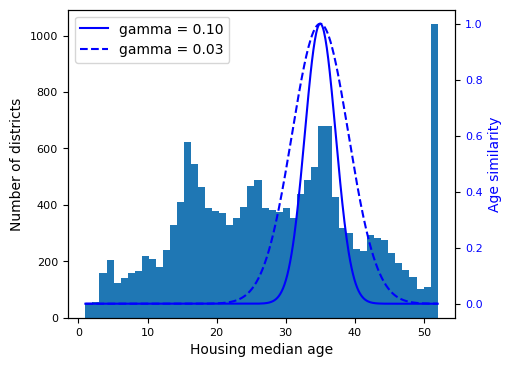

In [34]:
from sklearn.metrics.pairwise import rbf_kernel

ages = np.linspace(X_train["housing_median_age"].min(),
                   X_train["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots(figsize=(5,4))

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(X_train["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

### 3.1.5 Custom Transformers

Creating Simple Transformers with `FunctionTransformer`

In [50]:
# Returning pandas from transformation causes warnings
# As not every transformer can return a
from sklearn import set_config
set_config(transform_output = "default")

array([[<Axes: title={'center': 'population'}>]], dtype=object)

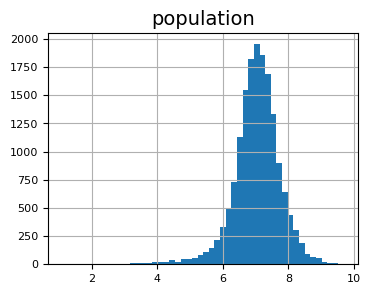

In [35]:
# Creating the log transformer

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_output = log_transformer.transform(X_train[["population"]])
log_output.hist(bins = 50, figsize = (4,3))

In [44]:
def rbf_transform(X):
    similarity = rbf_kernel(X, Y=np.array([[35.]]), gamma=0.1)
    return pd.DataFrame(similarity, index=X.index, columns=["similarity_to_35"])  # Convert to DataFrame


rbf_transformer = FunctionTransformer(rbf_transform)
age_simil_35 = rbf_transformer.transform(X_train[["housing_median_age"]])
age_simil_35.head()

,similarity_to_35
13096,2.811185e-13
14973,8.208500e-02
3785,6.703200e-01
14689,8.489044e-15
20507,9.048374e-01


In [49]:
## Ratio Transformer
ratio_transformer = FunctionTransformer(lambda X: X[:,[0]] / X[:,[1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])